<div style="display: flex; justify-content: space-between;">
    Index Number -  220067G / 220071M
    Group        -  A6
    Date         -  14/03/2024
</div>

# 3.1 Continuous-Time Systems: Convolution Integral

In [119]:
#imports
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# 3.1.1 Implementing Convolution Using Numerical Integration

***Task 1***  
Sketch the output of the listing 3.1 below and comment.

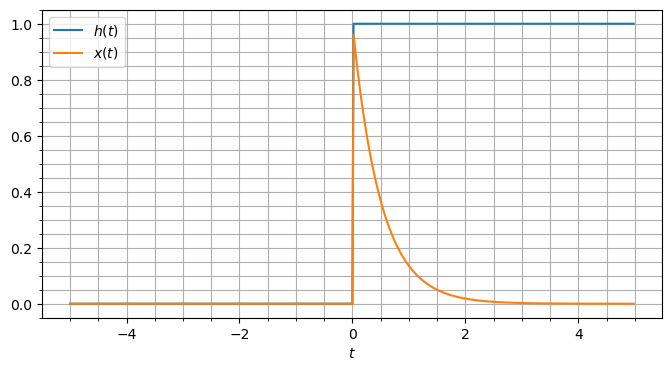

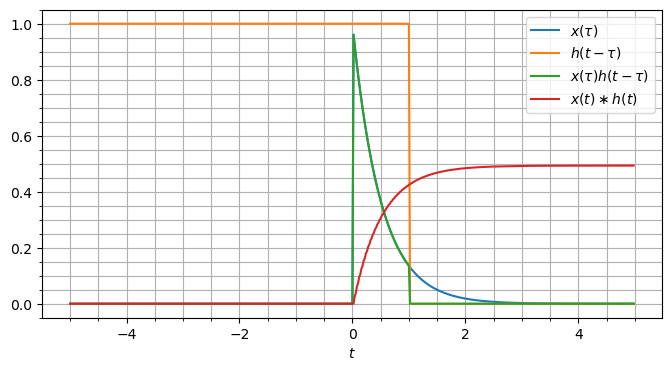

In [120]:
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T = 5 # Time range
t = np.arange(-T, T, 1/Fs) # Time samples

plt.figure(figsize=(8,4))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.minorticks_on()
plt.grid(which='both')
plt.legend()


# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)

plt.figure(figsize=(8,4))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')


# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simpson(y=product(t),x= t) # Actual convolution at time t
    
    
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.minorticks_on()
plt.grid(which='both')
plt.legend()
plt.show()


# 3.1.2 Convolving with a Signal Composed of Impulse Functions

***Task 2***  
Use the simpson's rule to obtain value for  
$\qquad \qquad \int_{-\infty}^{\infty} \delta(t) \, dt$

In [121]:
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

t= np.arange(-T, T, 1/fs)
int_delta= integrate.simpson(y=delta(t), x=t)

print(int_delta)

1.000000000000334


***Task 3***  
Write an expression for  
$\qquad \qquad y(t)=x(t)\ast h(t)$

![Image not Found](calculation.jpeg)

***Task 4***  
Compute $y(t)$ in a similar fashion as in Listing 3.1 and sketch.

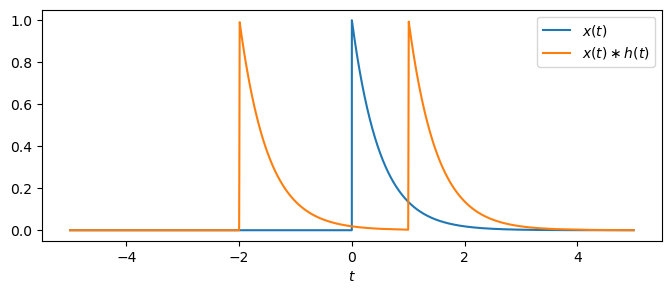

In [122]:
u=lambda t: 1*(t>0)
a=2

x=lambda t: (t>0)*np.exp(-a*t)*u(t)
h=lambda t: delta(t+2)+delta(t-1)

y=np.zeros(len(t))
for n, t_ in enumerate(t):
    product=lambda tau: x(tau)*h(t_-tau)
    y[n]=integrate.simpson(y=product(t), x=t)

plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(t)$')
plt.plot(t, y, label=r'$x(t)\ast h(t)$')
plt.xlabel(r'$t$')
plt.legend()
plt.show()

# 3.2 Discrete-Time Systems: Convolution Sum

In [123]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n - 1)
    hkmax = min(len(h), len(x) + len(h) - n - 1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


***Task 5***  
Sketch the output of the listing 3.3 above and comment

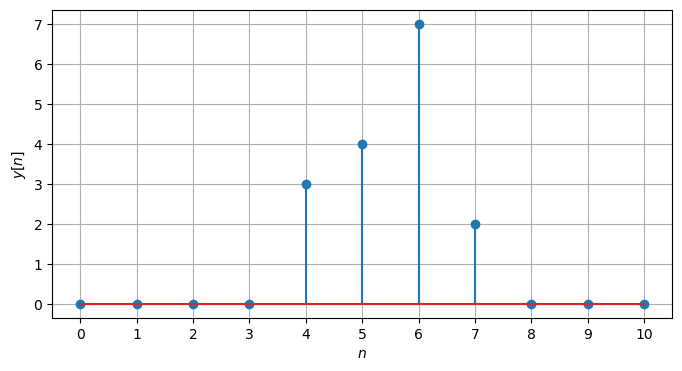

In [124]:
n=range(len(y))
plt.figure(figsize=(8,4))
plt.stem(n,y)
plt.xticks(n)
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.grid('major')
plt.show()

***Task 6***  
Study the listing 3.3 and use a for-loop to compute the convolution sum at each $n \in [-4, 4]$

y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


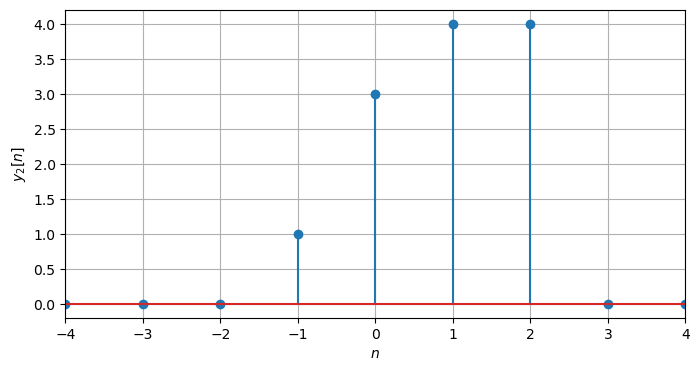

In [125]:
x_2 = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h_2 = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
hr_2 = np.flip(h_2)
xo = 2
ho = 4
y_2 = np.zeros(len(x_2) + len(h_2) - 1)
for n in range(len(y_2)):
    xkmin = max(0, n - len(h_2) + 1)
    xkmax = min(len(x_2), n + 1)
    hkmin = max(0, len(h_2) - n - 1)
    hkmax = min(len(h_2), len(x_2) + len(h_2) - n - 1)
    y_2[n] = np.sum(x_2[xkmin:xkmax]*hr_2[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y_2[n]))

n=np.arange(-8,9,1,dtype=int)

plt.figure(figsize=(8,4))
plt.stem(n,y_2)

plt.xticks(n)
plt.xlim(-4,4)
plt.xlabel(r'$n$')
plt.ylabel(r'$y_{2}[n]$')
plt.grid('major')
plt.show()



***Task 7***  
Use *scipy.signal.convolve* to compute the above convolution. Describe the effect of modes full, valid, and same.

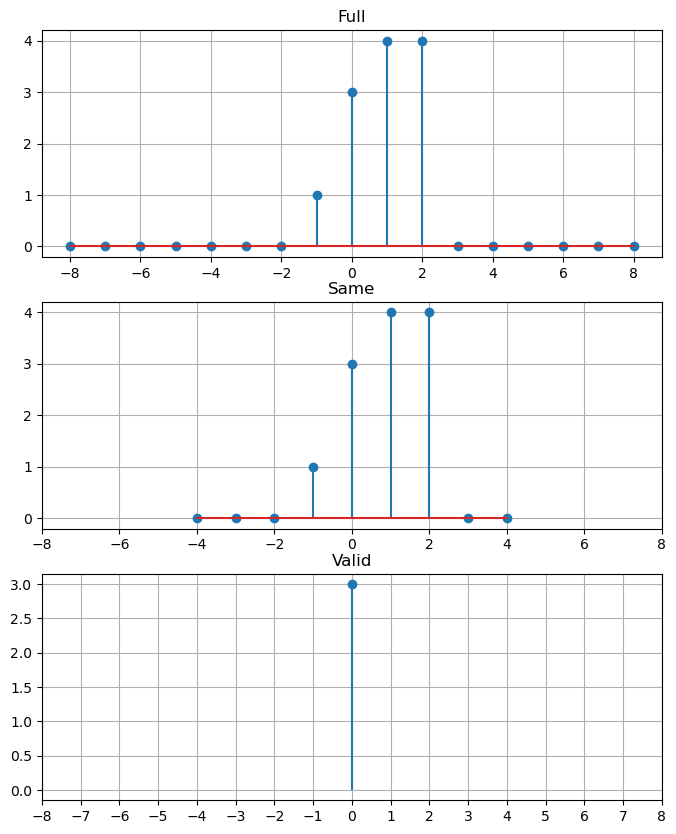

In [126]:
from scipy import signal
y1=signal.convolve(x_2, h_2, mode='full')
y2=signal.convolve(x_2, h_2, mode='same')
y3=signal.convolve(x_2, h_2, mode='valid')

n1=np.arange(-8,9,1,dtype=int)
n2=np.arange(-4,5,1,dtype=int)
n3=[0]

figure,axes=plt.subplots(3,1,figsize=(8,10))
axes[0].stem(n1,y1)
#axes[0].xticks(n)
axes[0].grid('major')
axes[0].set_title('Full')

axes[1].stem(n2,y2)
axes[1].set_xlim(-8,8)
axes[1].grid('major')
axes[1].set_title('Same')

axes[2].stem(n3,y3)
axes[2].set_xlim(-8,8)
axes[2].grid('major')
axes[2].set_title('Valid')

plt.xticks(n)
plt.show()


Full mode - Returns the convolution for all the n values given.  
Same mode - Returns the convolution for the values of n where x is defined.  
Valid mode - Returns the convolution for the values of n where x[n] and h[n] are totally overlapping.

# 3.3 An Application in Audio Signal Filtering

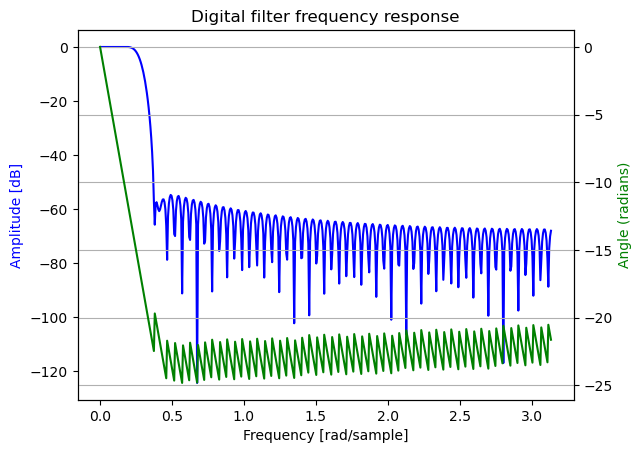

In [127]:
from scipy import signal
import soundfile as sf

data, samplerate = sf.read('anthem.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)


fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


***Task 8***  
Noting that data may have a pair of channels (stereo) use convolution to filter the audio signal.

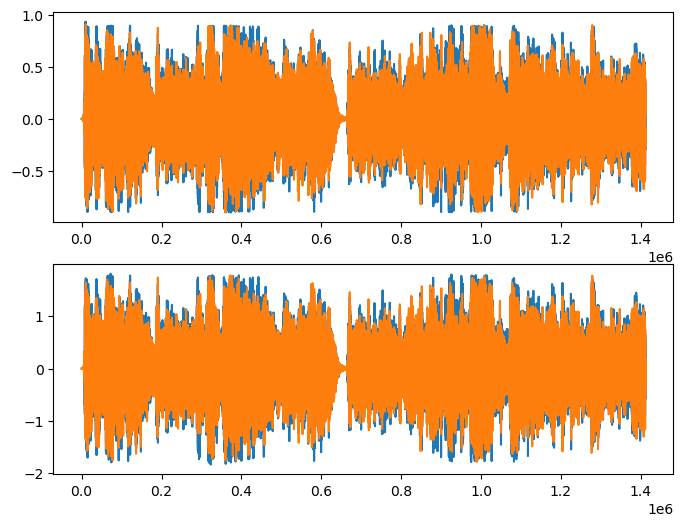

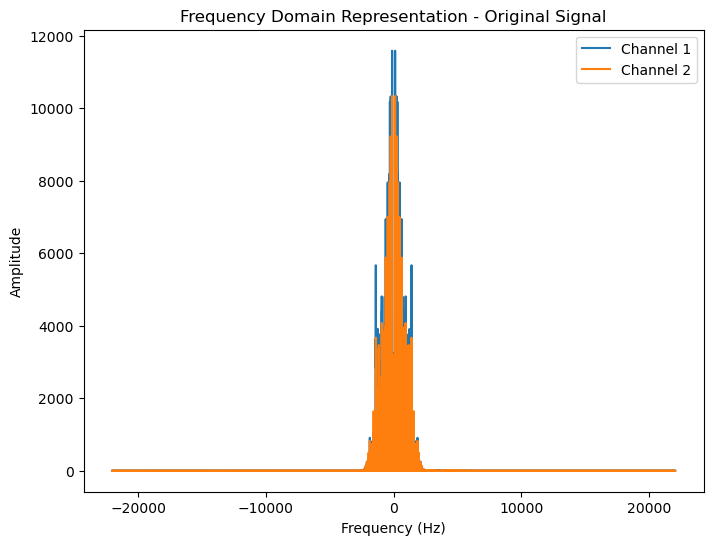

In [128]:
# Your code here for convolution.
from IPython.display import Audio

ch1=signal.convolve(data[:,0], b, mode='same')
ch2=signal.convolve(data[:,1], b, mode='same')


sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)

#plotting the waveform
figure,axes=plt.subplots(2,1,figsize=(8,6))
axes[0].plot(data)
axes[1].plot(np.vstack((ch1, ch2)).T + data)
plt.show()

freq = np.fft.fftfreq(len(ch1), 1/samplerate)

# Compute the FFT of the original signal
fft_orig_ch1 = np.fft.fft(ch1)
fft_orig_ch2 = np.fft.fft(ch2)


# Plot the FFT of the original signal
plt.figure(figsize=(8, 6))
plt.plot(freq, np.abs(fft_orig_ch1), label='Channel 1')
plt.plot(freq, np.abs(fft_orig_ch2), label='Channel 2')
plt.title('Frequency Domain Representation - Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

***Task 9***  
Creatively achieve various filtering effects

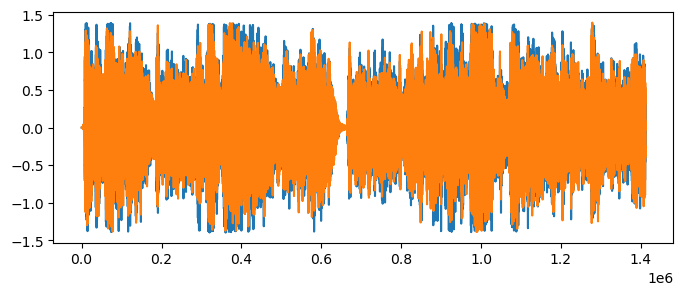

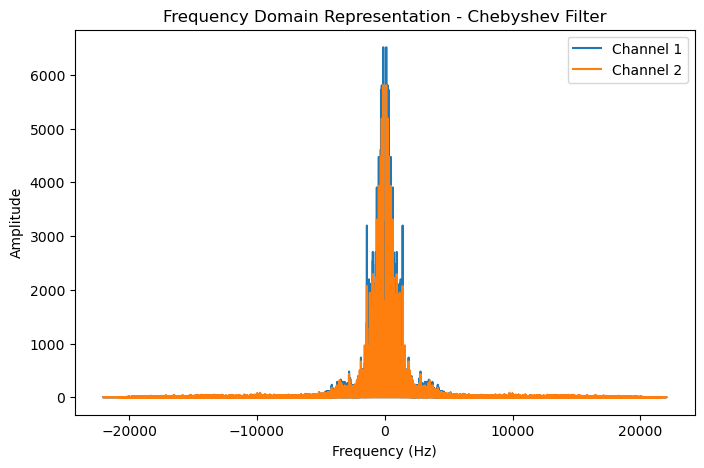

In [129]:
#Using chebyshev low pass filter
n =4
rp = 5
w=100
b,a = signal.cheby1(n, rp, w, btype='high', analog=True)

ch1=signal.convolve(data[:,0], b, mode='same')
ch2=signal.convolve(data[:,1], b, mode='same')

sf.write('audio_filtered_chebyshev_1.wav', np.vstack((ch1, ch2)).T + data, samplerate)


#plotting the waveform
plt.figure(figsize=(8, 3))
plt.plot(np.vstack((ch1, ch2)).T + data)
plt.show()

# Compute the FFT of the filtered signal
fft_ch1 = np.fft.fft(ch1)
fft_ch2 = np.fft.fft(ch2)

# Compute the frequencies corresponding to the FFT values
freq = np.fft.fftfreq(len(ch1), 1/samplerate)

# Plot the FFT of the filtered signal
plt.figure(figsize=(8, 5))
plt.plot(freq, np.abs(fft_ch1), label='Channel 1')
plt.plot(freq, np.abs(fft_ch2), label='Channel 2')
plt.title('Frequency Domain Representation - Chebyshev Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()




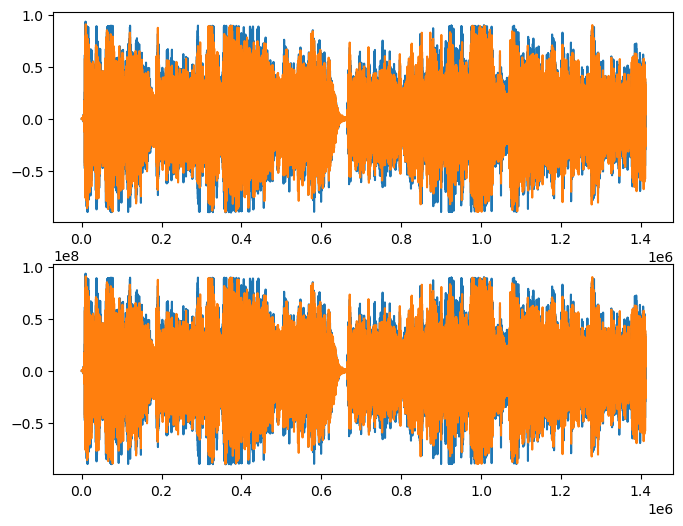

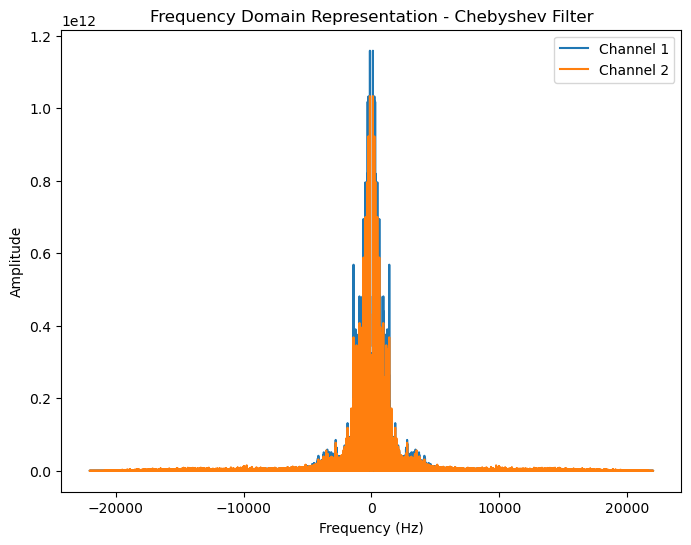

In [130]:
#using butterworth low pass filter
n = 4
w = 100
b,a = signal.butter(n, w, btype='low', analog=True)

ch1=signal.convolve(data[:,0], b, mode='same')
ch2=signal.convolve(data[:,1], b, mode='same')

sf.write('audio_filtered_butterworth_1.wav', np.vstack((ch1, ch2)).T + data, samplerate)


#plotting the waveform
figure,axes=plt.subplots(2,1,figsize=(8,6))
axes[0].plot(data)
axes[1].plot(np.vstack((ch1, ch2)).T + data)
plt.show()

# Compute the FFT of the filtered signal
fft_ch1 = np.fft.fft(ch1)
fft_ch2 = np.fft.fft(ch2)

# Compute the frequencies corresponding to the FFT values
freq = np.fft.fftfreq(len(ch1), 1/samplerate)

# Plot the FFT of the filtered signal
plt.figure(figsize=(8, 6))
plt.plot(freq, np.abs(fft_ch1), label='Channel 1')
plt.plot(freq, np.abs(fft_ch2), label='Channel 2')
plt.title('Frequency Domain Representation - Chebyshev Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 3.4 Convolution Sum in 2-D

In [131]:
x=np.array([(0,0,0,0,0),(0,0,0,0,0),(0,0,1,0,0),(0,0,0,0,0),(0,0,0,0,0)])
h=np.array([(1,2,3),(4,5,6),(7,8,9)])

***Task 10***  
Convolve the image $x[m, n]$ with filter $h[m,m]$.  
Hint: Use *signal.convolve2d*.

In [132]:
y=signal.convolve2d(x,h,mode='same')



***Task 11***  
Interpret the above result.

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


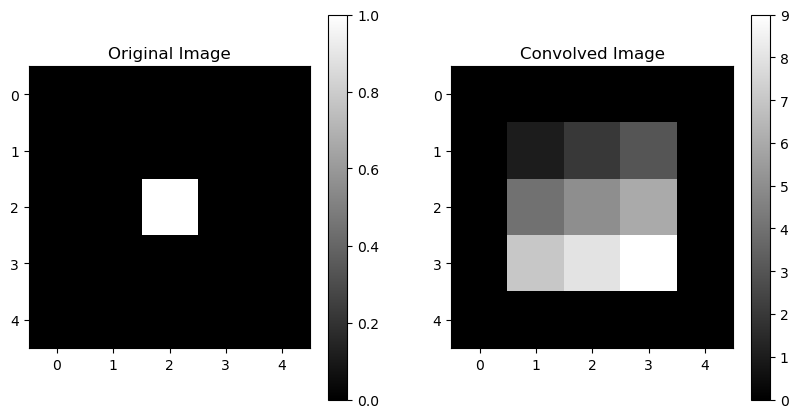

In [133]:
print(y)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x,cmap='gray')
plt.title('Original Image')
plt.colorbar()


plt.subplot(1, 2, 2)
plt.imshow(y,cmap='gray')
plt.title('Convolved Image')
plt.colorbar()

plt.show()

# 3.5 Application: Using Convolution to Filter an Image

***Task 12***  
Filter this image with the kernel
$$
\begin{bmatrix}
-1 & 0 & -1 \\
-2 &  0 & -2 \\
-1 & 0 & 1
\end{bmatrix}
$$

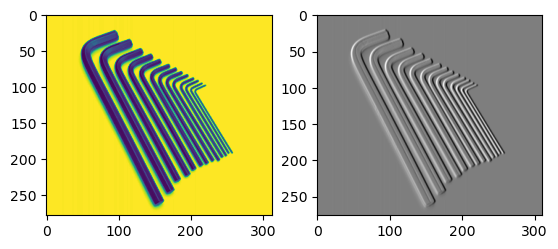

In [134]:
import matplotlib.image as mpimg


x = mpimg.imread('allenkeys.png')
x_new = np.mean(x, axis=2)
fig, ax = plt.subplots(1,2)
ax[0].imshow(x_new)

h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)])

y=signal.convolve2d(x_new,h,mode='valid')


ax[1].imshow(y, cmap='gray')
plt.show()
